In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def readData(string):
	df = pd.read_csv(string, sep=",", index_col=False)
	df.columns = ["x", "y"]
	data = np.array(df, dtype=float)
	return data[:, :-1], data[:, -1], df

In [3]:
def wm(point, X, gamma): 
    
  m = X.shape[0] 
    
  w = np.mat(np.eye(m)) 
    
  for i in range(m): 
        xi = X[i] 
        d = (-2 * gamma * gamma) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
  return w

In [4]:
def predict(X, y, point, gamma = 0.156): 
    
  m = X.shape[0] 

  X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
   
  point_ = np.array([point, 1], dtype=object) 
   
  w = wm(point_, X_, gamma)
  
    
  theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  pred = np.dot(point_, theta) 
    
  return theta, pred

In [5]:
def plot_predictions(X, y, gamma, nval):
  X_test, y_test, df_test = readData("test.csv")
    
  preds = [] 
    
  for point in X_test: 
    theta, pred = predict(X, y, point, gamma) 
    preds.append(pred)
        
  X_test = np.array(X_test).reshape(nval,1)
  preds = np.array(preds).reshape(nval,1)
  print(preds)
    
  plt.plot(X, y, 'b.')
  plt.plot(X_test, preds, 'r.')
  plt.show()

In [6]:
def error(X_test, y_test, gamma):
    preds = []
    nval = X_test.shape[0]
    for x in X_test:
        theta, pred = predict(X, y, x, gamma)
        preds.append(pred)
    preds = np.array(preds).reshape(nval,1)
    
    MSE = np.square(np.subtract(y_test,preds)).mean() 
 
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)

In [7]:
X, y, df = readData('train.csv')
y = y.reshape(y.shape[0], 1)

In [8]:
X_test, y_test, df_test = readData("test.csv")

In [9]:
y_test

array([-0.79278983,  3.43365909, -8.2500176 , -2.00117715,  3.91352092,
       -1.62955388, -0.35282525,  2.21631428,  4.35888959, -6.13742216])

[[array([-2.36660954])]
 [array([0.77089663])]
 [array([-4.82604657])]
 [array([0.9152169])]
 [array([4.11431181])]
 [array([-2.77570105])]
 [array([-0.86851365])]
 [array([0.41895811])]
 [array([2.41886367])]
 [array([-5.86321781])]]


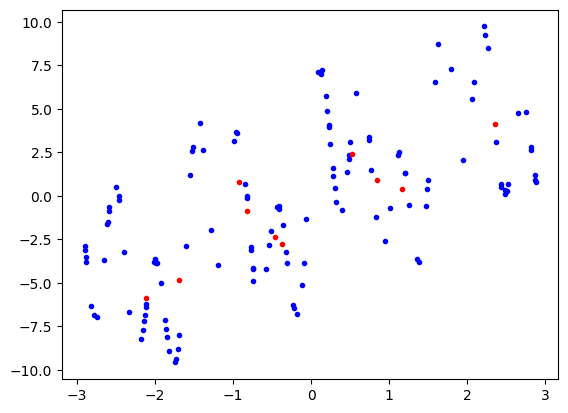

In [10]:
plot_predictions(X, y, 0.156, 10)

In [11]:
error(X_test, y_test, 0.156)

Root Mean Square Error:

5.018207551593326


*Here, considering the entire dataset, the root mean squared error for Locally Weighted Linear Regression is more than the Simple Linear Regression with any amount of depth. Moreover, here, for locally weighted we need to incorporate the entire dataset everytime we need to make predictions. Hence, we can infer that, for the given dataset, Simple Linear Regression performs better than Locally Weighted*

In [12]:
def error(X_test, y_test, gamma):
    preds = []
    nval = X_test.shape[0]
    for x in X_test:
        theta, pred = predict(X[:20], y[:20], x, gamma)
        preds.append(pred)
    preds = np.array(preds).reshape(nval,1)
    
    MSE = np.square(np.subtract(y_test,preds)).mean() 
 
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)

In [13]:
error(X_test, y_test, 0.156)

Root Mean Square Error:

6.568220217254111


*Here it can be inferred that the root mean squared for 20 elements is more for Locally Weighted Linear Regression as compared to the steady state of Simple Linear Regression for the same. Hence, based on both the evidencces we can deduce that the Simple Linear Regression curve fits the dataset better than the Locally Weighted Linear Regression curve*

*From the above results, we can infer that the data doesn't performs better with the function "Theta(0) + Theta(1)x" which corresponds with the Locally Weighted Linear Regression. But it can be deduced that the funnction does not require local weights assignment and works better in tune with the Simple Linear Regression function* 